In [1]:
import sys
sys.path.append('../')
from jax import numpy as jnp
from jax import config
config.update("jax_enable_x64", True)
from src_jax import densities, factors
from matplotlib import pyplot as plt

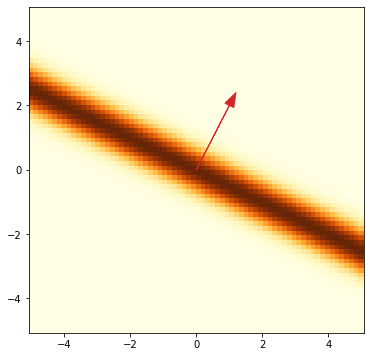

In [7]:
w = jnp.array([1.,2])
h_tilde = 0

# Note: we have to do a transform because the factors are parametrized through natural parameters.
kernel = factors.OneRankFactor(v=jnp.array([w]), nu=jnp.array([w * h_tilde]), ln_beta=jnp.array([-.5 * h_tilde ** 2]))

grid_points = 70
xrange = jnp.linspace(-5,5,grid_points)
xmesh, ymesh = jnp.meshgrid(xrange, xrange)
x = jnp.vstack([xmesh.flatten(), ymesh.flatten()]).T

kernel_eval = kernel.evaluate(x).reshape(grid_points, grid_points)
plt.figure(figsize=(6,6))
plt.pcolor(xrange, xrange, kernel_eval, shading='nearest', cmap='YlOrBr')
plt.arrow(.5*h_tilde/w[0],.5*h_tilde/w[1],w[0],w[1],head_width=.3, color='C3')

plt.show()